# CSYE 7105 - High Perfoamnce Machine Learning & AI - Project - Team 4 

## Analysis of Efficient Parallel Computing for Deep Learning-Based Glaucoma Detection

### Run time, Speed Up  , Efficiency and much more for CPU Training 

#### Importing necessary libraries

In [1]:
import os
import json
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part 1 - Serial Processing Analysis

#### Training loss and Accuraccy 

In this section, we analyze the training process of the model using a single CPU. The following two graphs show the performance of the model during training and validation.

Loss Curves: The first graph illustrates the training loss and validation loss over 10 epochs. The training loss (blue curve) consistently decreases, indicating that the model is improving during training. The validation loss (orange curve) also decreases but fluctuates slightly, which can suggest that the model is fitting the training data well but might experience some generalization issues.

Accuracy Curves: The second graph displays the training accuracy and validation accuracy over the epochs. The training accuracy (blue curve) increases steadily, reaching a high value by the end of the training. The validation accuracy (orange curve) also shows a gradual improvement but starts to plateau, reflecting a strong performance on unseen data after a few epochs.

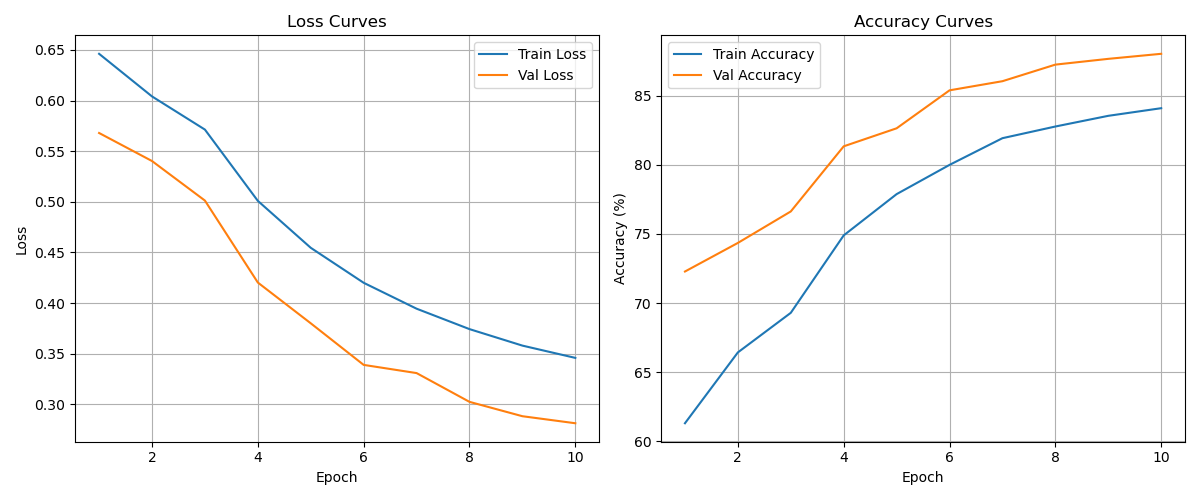

In [2]:
training_loss_path = "../SerialProcessing/cpu/plots/training_using_cpus_1_results.png"
Image(filename=training_loss_path)

### Part 2 - Parallelization with Workers - 1,2,4,8,16,24,32

In [3]:
# Reading files and formating

In [4]:
import json
import pandas as pd

serial_cpu_training_time = '../SerialProcessing/cpu/metrics/training_using_cpus_1_params.json'
workers_2_training_time = '../ParallelProcessing/cpus_with_DDP/metrics/training_using_cpus_2_params.json'
workers_4_training_time = '../ParallelProcessing/cpus_with_DDP/metrics/training_using_cpus_4_params.json'
workers_8_training_time = '../ParallelProcessing/cpus_with_DDP/metrics/training_using_cpus_8_params.json'
workers_16_training_time = '../ParallelProcessing/cpus_with_DDP/metrics/training_using_cpus_16_params.json'
workers_24_training_time = '../ParallelProcessing/cpus_with_DDP/metrics/training_using_cpus_24_params.json'
workers_32_training_time = '../ParallelProcessing/cpus_with_DDP/metrics/training_using_cpus_32_params.json'

def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

serial_cpu_data = load_json(serial_cpu_training_time)
workers_2_data = load_json(workers_2_training_time)
workers_4_data = load_json(workers_4_training_time)
workers_8_data = load_json(workers_8_training_time)
workers_16_data = load_json(workers_16_training_time)
workers_24_data = load_json(workers_24_training_time)
workers_32_data = load_json(workers_32_training_time)

serial_cpu_time_seconds = serial_cpu_data.get('computing_time') if serial_cpu_data.get('computing_time') else None
workers_2_time_seconds = workers_2_data.get('train_time') if workers_2_data.get('train_time') else None
workers_4_time_seconds = workers_4_data.get('train_time') if workers_4_data.get('train_time') else None
workers_8_time_seconds = workers_8_data.get('train_time') if workers_8_data.get('train_time') else None
workers_16_time_seconds = workers_16_data.get('train_time') if workers_16_data.get('train_time') else None
workers_24_time_seconds = workers_24_data.get('train_time') if workers_24_data.get('train_time') else None
workers_32_time_seconds = workers_32_data.get('train_time') if workers_32_data.get('train_time') else None

serial_cpu_accuracy = serial_cpu_data.get('test_accuracy') if serial_cpu_data.get('test_accuracy') else None
workers_2_accuracy = workers_2_data.get('test_accuracy') if workers_2_data.get('test_accuracy') else None
workers_4_accuracy = workers_4_data.get('test_accuracy') if workers_4_data.get('test_accuracy') else None
workers_8_accuracy = workers_8_data.get('test_accuracy') if workers_8_data.get('test_accuracy') else None
workers_16_accuracy = workers_16_data.get('test_accuracy') if workers_16_data.get('test_accuracy') else None
workers_24_accuracy = workers_24_data.get('test_accuracy') if workers_24_data.get('test_accuracy') else None
workers_32_accuracy = workers_32_data.get('test_accuracy') if workers_32_data.get('test_accuracy') else None

def convert_to_hhmm(minutes):
    if minutes is None:
        return None
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"

data = {
    "Workers": [1, 2, 4, 8, 16, 24, 32],
    "Train Time (Seconds)": [serial_cpu_time_seconds, workers_2_time_seconds, workers_4_time_seconds, workers_8_time_seconds, workers_16_time_seconds, workers_24_time_seconds, workers_32_time_seconds],
    "Train Time (Minutes)": [serial_cpu_time_seconds / 60, workers_2_time_seconds / 60, workers_4_time_seconds / 60, workers_8_time_seconds / 60, workers_16_time_seconds / 60, workers_24_time_seconds / 60, workers_32_time_seconds / 60],
    "Train Time (HH:MM)": [convert_to_hhmm(serial_cpu_time_seconds / 60), convert_to_hhmm(workers_2_time_seconds / 60), convert_to_hhmm(workers_4_time_seconds / 60), convert_to_hhmm(workers_8_time_seconds / 60), convert_to_hhmm(workers_16_time_seconds / 60), convert_to_hhmm(workers_24_time_seconds / 60), convert_to_hhmm(workers_32_time_seconds / 60)],
    "Test Accuracy": [serial_cpu_accuracy, workers_2_accuracy, workers_4_accuracy, workers_8_accuracy, workers_16_accuracy, workers_24_accuracy, workers_32_accuracy]
}

df_training_times = pd.DataFrame(data)

In [5]:
df_training_times

,Workers,Train Time (Seconds),Train Time (Minutes),Train Time (HH:MM),Test Accuracy
0,1,46234.662717,770.577712,12:50,86.986778
1,2,23916.262618,398.604377,06:38,87.404315
2,4,12993.086544,216.551442,03:36,84.979138
3,8,7060.608250,117.676804,01:57,88.873435
4,16,5241.370863,87.356181,01:27,86.230876
5,24,4871.955017,81.199250,01:21,87.204451
6,32,3785.717927,63.095299,01:03,86.648122


In [6]:
# Adding speedup and efficiency calculation
df_training_times['Speedup'] = [None] + [(df_training_times.iloc[0]['Train Time (Seconds)'] / row['Train Time (Seconds)']) for idx, row in df_training_times.iloc[1:].iterrows()]
df_training_times['Efficiency'] = df_training_times['Speedup'] / df_training_times['Workers']

In [7]:
df_training_times

,Workers,Train Time (Seconds),Train Time (Minutes),Train Time (HH:MM),Test Accuracy,Speedup,Efficiency
0,1,46234.662717,770.577712,12:50,86.986778,NaN,NaN
1,2,23916.262618,398.604377,06:38,87.404315,1.933189,0.966595
2,4,12993.086544,216.551442,03:36,84.979138,3.558405,0.889601
3,8,7060.608250,117.676804,01:57,88.873435,6.548255,0.818532
4,16,5241.370863,87.356181,01:27,86.230876,8.821101,0.551319
5,24,4871.955017,81.199250,01:21,87.204451,9.489961,0.395415
6,32,3785.717927,63.095299,01:03,86.648122,12.212918,0.381654


#### Training Speed Comparison

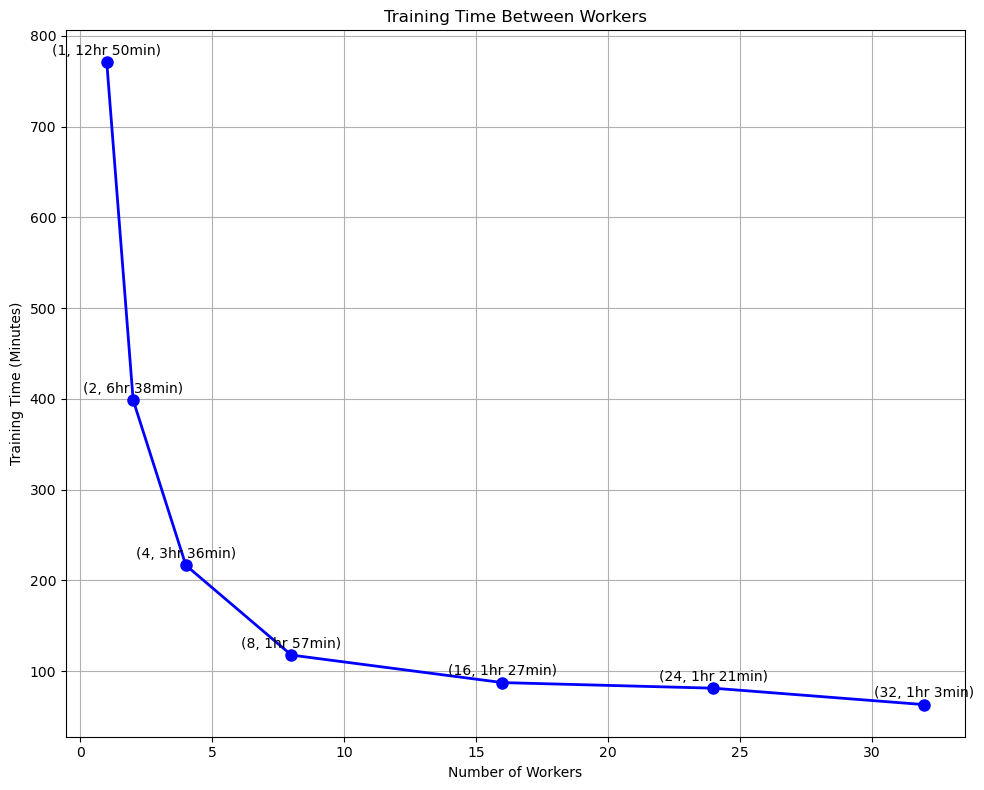

In [8]:
workers = df_training_times['Workers']
train_times_minutes = df_training_times['Train Time (Minutes)']

def convert_to_hr_min(minutes):
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours}hr {mins}min"

plt.figure(figsize=(10, 8))

plt.plot(workers, train_times_minutes, color='b', marker='o', linestyle='-', linewidth=2, markersize=8)

for i, time in enumerate(train_times_minutes):
    hr_min = convert_to_hr_min(time)
    plt.text(workers[i], time + 5, f"({workers[i]}, {hr_min})", ha='center', va='bottom', fontsize=10)

plt.ylabel('Training Time (Minutes)')
plt.xlabel('Number of Workers')
plt.title('Training Time Between Workers')

plt.grid(True)
plt.tight_layout()
plt.show()

The above graph illustrates that - as the number of workers increases, the training time decreases significantly. The graph shows the training time for various worker configurations, starting from 1 worker (12 hours and 50 minutes) and moving towards 32 workers, where the time reduces to around 1 hour and 3 minutes. This highlights the scalability of the training process, demonstrating that adding more workers significantly reduces the time required for training, which is a common benefit in parallel processing scenarios.

#### Speedup 

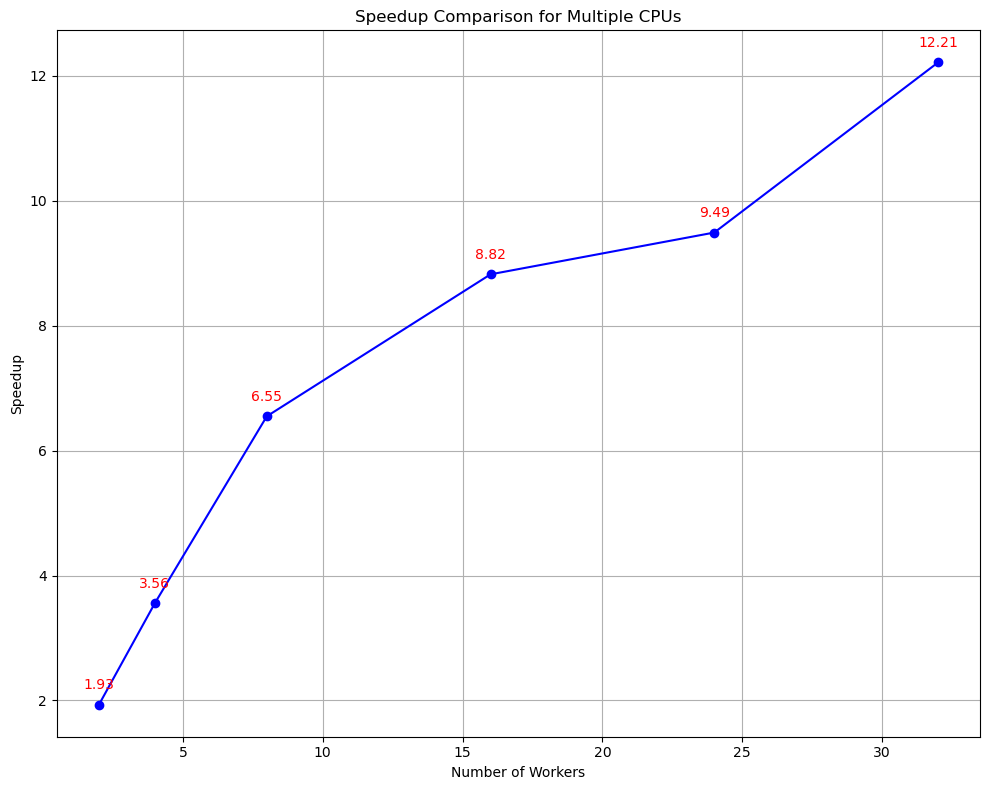

In [9]:
speedup_data = df_training_times['Speedup']
workers = df_training_times['Workers']

plt.figure(figsize=(10, 8))

plt.plot(workers, speedup_data, marker='o', linestyle='-', color='b', label='Speedup')

for i, v in enumerate(speedup_data):
    plt.text(workers[i], v + 0.2, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='red')

plt.title('Speedup Comparison for Multiple CPUs')
plt.xlabel('Number of Workers')
plt.ylabel('Speedup')

plt.grid(True)

plt.tight_layout()
plt.show()

The above graph illustrates the speedup achieved by using multiple CPUs (workers) during training. As the number of workers increases, the speedup improves significantly. Starting with a speedup of 1.93x with 2 workers, the speedup increases progressively to 12.21x with 32 workers. This plot indicates that the parallelization with additional workers provides a greater improvement in speedup, showcasing the efficiency of multi-worker setups for faster processing and training completion.

#### Efficiency

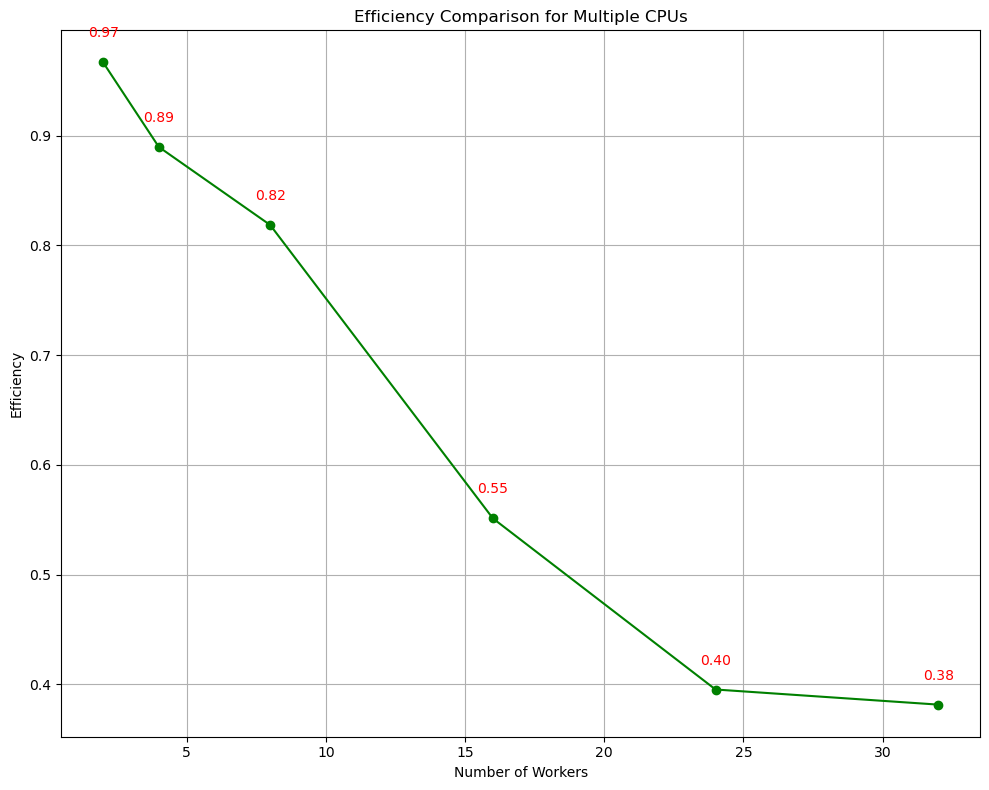

In [10]:
import matplotlib.pyplot as plt

# Efficiency data
efficiency_data = df_training_times['Efficiency']
workers = df_training_times['Workers']

plt.figure(figsize=(10, 8))

# Plotting the efficiency
plt.plot(workers, efficiency_data, marker='o', linestyle='-', color='g', label='Efficiency')

# Adding annotations for efficiency values
for i, v in enumerate(efficiency_data):
    plt.text(workers[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='red')

# Adding title and labels
plt.title('Efficiency Comparison for Multiple CPUs')
plt.xlabel('Number of Workers')
plt.ylabel('Efficiency')

# Displaying grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


The speedup graph shows a clear increase in performance with more workers, demonstrating that using multiple CPUs significantly reduces the training time. Initially, the speedup is modest, with 2 workers offering a 1.93x speedup, but as the number of workers increases to 32, the speedup reaches 12.21x. This indicates that the system effectively benefits from parallelization. However, the increase in speedup is not perfectly linear, suggesting that while adding workers accelerates computation, the performance gain starts to plateau as the number of workers increases beyond a certain point.

On the other hand, the efficiency graph reveals a decrease in efficiency as the number of workers increases. Efficiency, which measures the effectiveness of parallelization by comparing the speedup to the number of workers, drops from 0.97 at 2 workers to 0.38 at 32 workers. This decline suggests that while adding more workers reduces training time (increasing speedup), the overhead of managing additional workers, such as communication and synchronization costs, starts outweighing the benefits. Therefore, although speedup improves with more workers, the diminishing efficiency indicates a point of diminishing returns as the system becomes less efficient with higher worker counts.

#### Comparing Test Accuraccy

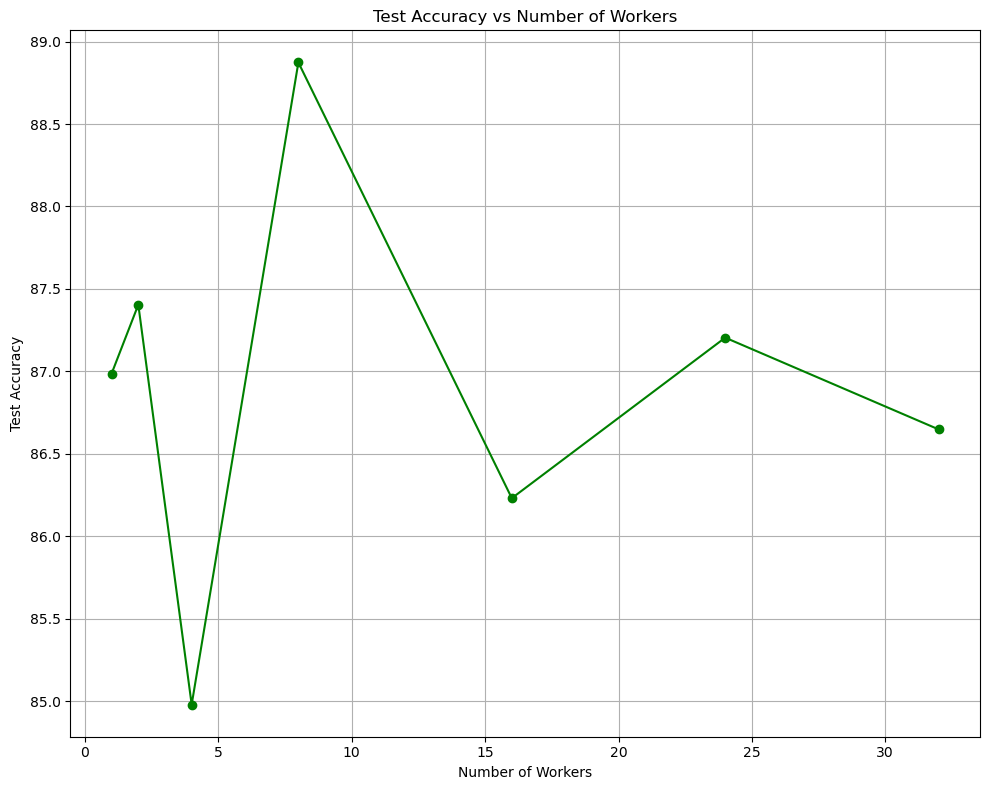

In [11]:
workers = df_training_times['Workers']
test_accuracy = df_training_times['Test Accuracy']

plt.figure(figsize=(10, 8))

plt.plot(workers, test_accuracy, marker='o', linestyle='-', color='g', label='Test Accuracy')

plt.title('Test Accuracy vs Number of Workers')
plt.xlabel('Number of Workers')
plt.ylabel('Test Accuracy')

plt.grid(True)

plt.tight_layout()
plt.show()

The above graph above illustrates the relationship between the number of workers and the test accuracy during model training. Initially, when only 2 workers are used, the test accuracy is quite low, around 87%. As the number of workers increases, the test accuracy fluctuates, reaching its highest point (nearly 89%) with 8 workers. However, beyond that, the accuracy dips again as the number of workers increases to 16 and 24. The graph shows that after reaching the peak at 8 workers, the performance starts to degrade slightly with 16 workers, then fluctuates again before stabilizing around 87% with 32 workers.

The non-linear pattern observed in the test accuracy suggests that while increasing the number of workers can help reduce the training time (as seen in the previous analysis), it may not always result in improved model performance. This could indicate that as the system scales, the added complexity from parallelization may introduce noise or instability that negatively impacts the model's ability to generalize. Therefore, while performance (speedup) improves with more workers, the test accuracy shows a less consistent pattern, highlighting the tradeoff between speed and accuracy when scaling the model with additional workers.